I'm working on building up my software tools to handle logical encodings, and eventually will reach the transpiler layer where we handle ancillas, detecting errors, correcting errors - and being able to use the transpiled circuits to calculate effective error rates.
along the way discovered something interesting, In this example I'm working with dual-rail for simplicity while developing/debugging, (but is designed to be generic)


First, I explicitly print out the unitary for detecting an error, which is just a parity check.


In [9]:
from quantum_logical.basis import DualRail

encoding = DualRail()
# print(encoding.ancilla[0].detection_operator.to_matrix())
u1 = encoding.ancilla[0].detection_operator.to_matrix()
print(u1)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Then, if I put this unitary into a circuit and use optimization level 3, it finds this.

which is odd, because at end we confirm that the unitary is equivalent to the basic circuit we recognize as the parity check.

I suppose the take away is that Qiskit is not good at synthesizing or simplifying multi-qubit gates?


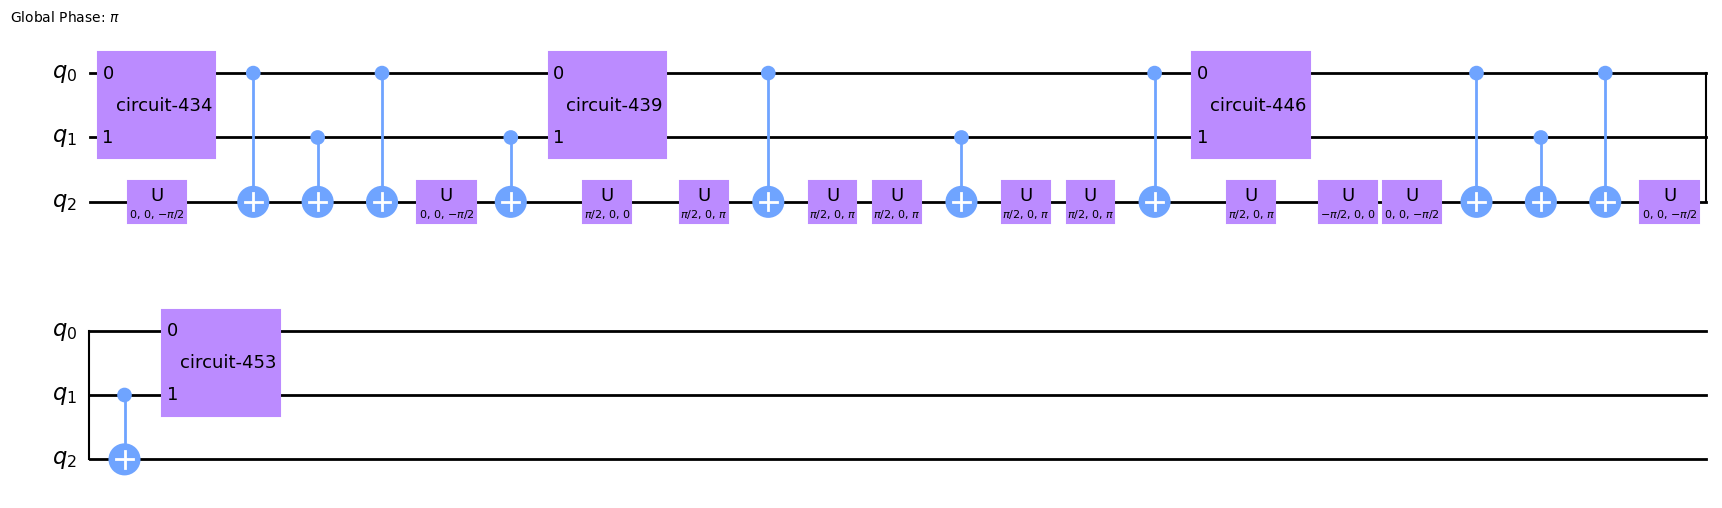

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator

qc = QuantumCircuit(3)
qc.append(encoding.ancilla[0].detection_operator, [0, 1, 2])
qc.decompose().draw("mpl")

In [11]:
# print(Operator(qc).data)
u2 = Operator(qc).data
print(u2)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


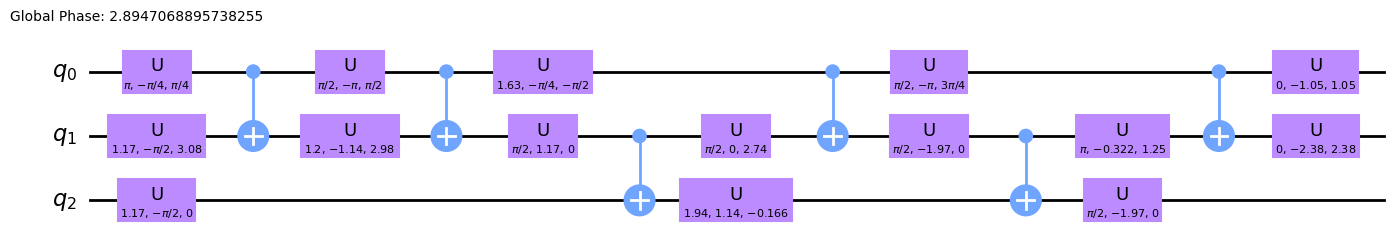

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator

qc = QuantumCircuit(3)
qc.append(encoding.ancilla[0].detection_operator, [0, 1, 2])
qc.decompose().draw("mpl")
qc = transpile(qc, basis_gates=["u", "cx"], optimization_level=3)
qc.decompose().draw("mpl")

In [13]:
# print(Operator(qc).data)
u2 = Operator(qc).data
print(u2)

[[ 1.38777878e-16+2.22044605e-16j  9.63794396e-17-5.06091754e-17j
   2.53458727e-16-4.11390107e-16j -1.74369427e-17+2.74406796e-17j
   1.00000000e+00-2.84579258e-15j  1.06724791e-16+2.77171441e-16j
  -2.21192955e-16-1.32409268e-16j  3.90137867e-17+2.34556237e-16j]
 [-4.69195461e-17+3.44762663e-16j  1.00000000e+00-1.51121399e-15j
   3.30511800e-16+3.72441717e-16j -4.95835755e-17+1.31337082e-16j
  -5.57788804e-17-4.30223584e-17j -1.94289029e-16-5.55111512e-16j
   3.62203806e-17-1.40321883e-17j -9.43235783e-17-4.40878057e-16j]
 [ 2.35915652e-16-2.53453095e-16j -2.37444654e-16+6.22376382e-16j
   1.00000000e+00-2.18581566e-15j  6.13465028e-17+3.29735677e-16j
  -2.79888496e-16-4.17704771e-16j -3.10701460e-17+1.14070106e-17j
  -3.33066907e-16-3.33066907e-16j -4.52902942e-17-4.34297724e-17j]
 [-6.26712803e-19-1.06172387e-17j  8.26906164e-17-4.59004985e-16j
   2.25271324e-17-2.74749738e-17j  2.49800181e-16+1.66533454e-16j
  -2.17425127e-16+3.80372627e-16j  1.70693737e-16+4.89518198e-17j
  -1.82

This is somewhat unfortunate, because I was hoping to use the transpiler as a way of finding optimized encodings, for example, if the detect and correct operators simplified into really efficient subcircuits (for some particular basis gate). but if it can't even find this really basic circuit than this would not be a good way to search for efficient encodings


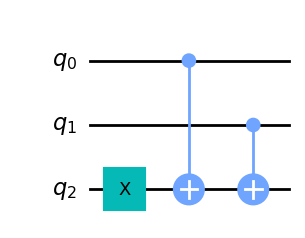

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [14]:
qc = QuantumCircuit(3)
qc.x(2)
qc.cx(0, 2)
qc.cx(1, 2)
display(qc.draw("mpl"))
# print(Operator(qc).data)
u3 = Operator(qc).data
print(u3)

In [15]:
import numpy as np

assert np.allclose(u2, u3)